# Credit Risk Modelling

## Data Exploring & Cleansing

In [1]:
#interest in finding out the prob of default
import pandas as pd
cr_loan=pd.read_csv('cr_loan_raw.csv')

In [2]:
cr_loan.head

<bound method NDFrame.head of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt 

In [3]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [5]:
len(cr_loan.dtypes)

12

In [6]:
cr_loan.shape

(32581, 12)

## Histogram, Scatterplot, Cross Table 
#### to see relationships between data as well as looking at the outliers

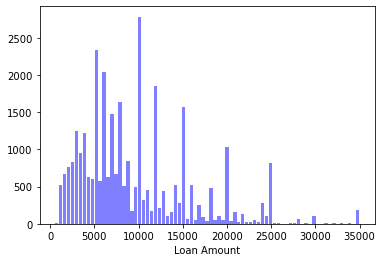

In [7]:
# Look at the distribution of loan amounts with a histogram
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.5, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

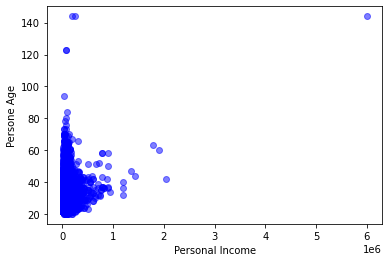

In [8]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [9]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [10]:
#Create a cross table of home ownership grouped by loan_status and loan_grade.
#look at difference of [] between this line and the next line 
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [11]:
#mean interest rate group by loan_status and person_home_ownership
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], values=cr_loan['loan_int_rate'], aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [12]:
# Create a cross table of home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


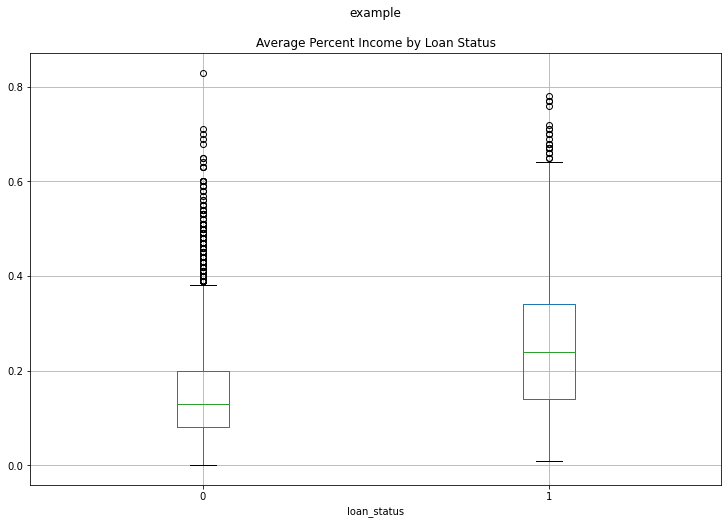

In [13]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status',figsize=(12,8)) #vert=False
plt.title('Average Percent Income by Loan Status')
plt.suptitle('example')
plt.show()

## Removing Outliers

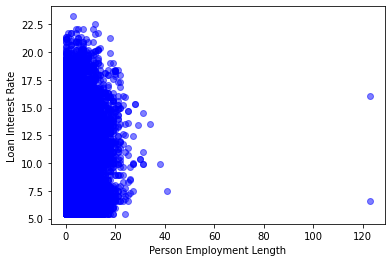

In [14]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel('Person Employment Length')
plt.ylabel('Loan Interest Rate')
plt.show()

In [15]:
cr_loan[cr_loan['person_emp_length'] >= 60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [16]:
cr_loan[cr_loan['person_emp_length'] >= 60].index

Int64Index([0, 210], dtype='int64')

In [17]:
indices = cr_loan[cr_loan['person_emp_length'] >= 60].index;
cr_loan.drop(indices, inplace=True)

#cr_loan_new = cr_loan.drop(indices)

In [18]:
cr_loan.shape

(32579, 12)

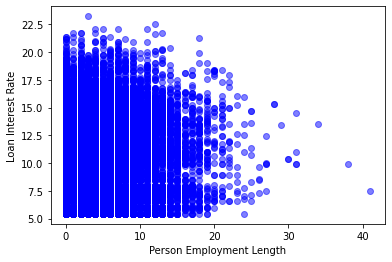

In [19]:
# Plot again to see the difference
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel('Person Employment Length')
plt.ylabel('Loan Interest Rate')
plt.show()

In [20]:
# Create the cross table for loan status, home ownership, and the max employment length
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,38.0,24.0,31.0,41.0
1,34.0,11.0,17.0,27.0


In [21]:
# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc=['mean','max'])

mean                                    max        \
person_home_ownership  MORTGAGE     OTHER       OWN      RENT MORTGAGE OTHER   
loan_status                                                                    
0                      5.891904  3.945946  5.316986  3.939440     38.0  24.0   
1                      5.755828  3.090909  3.161677  3.625225     34.0  11.0   

                                   
person_home_ownership   OWN  RENT  
loan_status                        
0                      31.0  41.0  
1                      17.0  27.0

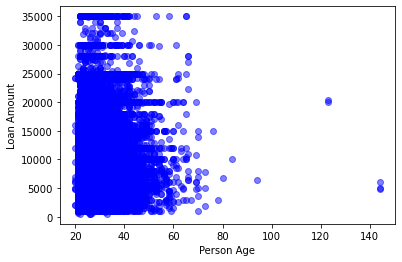

In [22]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [23]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index,inplace=True)

In [24]:
cr_loan.shape

(32574, 12)

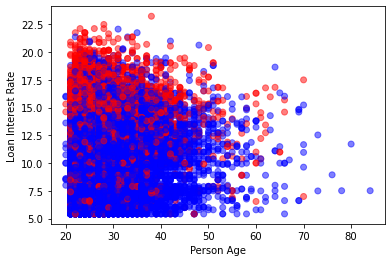

In [25]:
import matplotlib
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan['person_age'],
            cr_loan['loan_int_rate'],
            c = cr_loan['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5,
           )
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()


## Handling with Missing Data

In [26]:
cr_loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [27]:
# Print a null value column array
null_columns=cr_loan.columns[cr_loan.isnull().any()]

In [28]:
null_columns

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [29]:
cr_loan[null_columns].isnull().sum()

person_emp_length     895
loan_int_rate        3115
dtype: int64

In [30]:
# Print the top five rows with nulls for employment length
cr_loan[cr_loan['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [31]:
# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

In [32]:
cr_loan[null_columns].isnull().sum()

person_emp_length       0
loan_int_rate        3115
dtype: int64

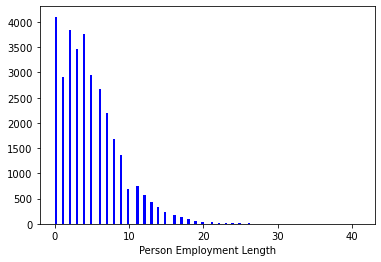

In [33]:
# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [34]:
# Print the number of nulls in loan_int_rate
cr_loan['loan_int_rate'].isnull().sum()

3115

In [35]:
# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

In [36]:
indices

Int64Index([   39,    50,    57,    59,    62,    70,    71,    84,    85,
               87,
            ...
            32505, 32510, 32532, 32535, 32546, 32547, 32552, 32553, 32569,
            32570],
           dtype='int64', length=3115)

In [37]:
# Save the new data without missing data
cr_loan = cr_loan.drop(indices)
#cr_loan.drop(indices,inplace=True)

In [38]:
cr_loan.shape

(29459, 12)

In [39]:
cr_loan_formodel=pd.read_csv('cr_loan_formodel.csv')

In [40]:
cr_loan_formodel.shape
#this data set use pivot table so that additional columns are created

(29459, 27)

In [41]:
# Count the number of records for each unique value
cr_loan['person_home_ownership'].value_counts()

RENT        14890
MORTGAGE    12119
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

In [42]:
#check number of levels in a column
len(cr_loan['person_home_ownership'].value_counts())

4

# Logit

#### One regressor

In [43]:
# Create the X and y data sets, use loan_int_rate only to observe the logistic model first
X = cr_loan[['loan_int_rate']]
y = cr_loan[['loan_status']]

In [44]:
X.shape

(29459, 1)

In [45]:
y.shape

(29459, 1)

In [46]:
from sklearn.linear_model import LogisticRegression
#clf_logistic_single is used to store a trained model
clf_logistic_single = LogisticRegression(solver='lbfgs')

In [47]:
clf_logistic_single

LogisticRegression()

In [48]:
import numpy as np
clf_logistic_single.fit(X, np.ravel(y))

LogisticRegression()

In [49]:
clf_logistic_single.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
clf_logistic_single.intercept_

array([-4.45785901])

In [51]:
clf_logistic_single.coef_

array([[0.27144214]])

## Multi Regressor

In [52]:
# Create X data for the model
X_multi = cr_loan[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan[['loan_status']]

In [53]:
# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

In [54]:
# Print the intercept of the model
clf_logistic_multi.intercept_
#this intercept value is closer to zero,
#this suggests the log odds(z) of a non-default is approaching zero.

array([-4.21645549])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=.4, random_state=123)

In [56]:
X_multi.shape,X_train.shape,X_test.shape

((29459, 2), (17675, 2), (11784, 2))

In [57]:
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
clf_logistic.coef_
#Since there are two regressors
#The more positive is the value, the more it predicts default.

array([[ 0.27126212, -0.05189709]])

In [58]:
#one hot encoding, like pivot table in SQL

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan.select_dtypes(exclude=['object'])
cred_str = cr_loan.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [59]:
cr_loan_prep.dtypes

person_age                          int64
person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE      uint8
person_home_ownership_OTHER         uint8
person_home_ownership_OWN           uint8
person_home_ownership_RENT          uint8
loan_intent_DEBTCONSOLIDATION       uint8
loan_intent_EDUCATION               uint8
loan_intent_HOMEIMPROVEMENT         uint8
loan_intent_MEDICAL                 uint8
loan_intent_PERSONAL                uint8
loan_intent_VENTURE                 uint8
loan_grade_A                        uint8
loan_grade_B                        uint8
loan_grade_C                        uint8
loan_grade_D                        uint8
loan_grade_E                        uint8
loan_grade_F                      

In [60]:
X_train.columns

Index(['loan_int_rate', 'person_emp_length'], dtype='object')

In [61]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

In [62]:
preds #first column is non_default, second column is default(y=1)

array([[0.66076115, 0.33923885],
       [0.53514117, 0.46485883],
       [0.90419403, 0.09580597],
       ...,
       [0.79328529, 0.20671471],
       [0.74527736, 0.25472264],
       [0.74684671, 0.25315329]])

In [63]:
type(preds)

numpy.ndarray

In [64]:
# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

In [65]:
preds_df

,prob_default
0,0.339239
1,0.464859
2,0.095806
3,0.144805
4,0.144894


In [66]:
true_df

,loan_status
31622,1
24935,1
15342,0
3460,0
16424,1


In [67]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))
#seems not accurate enough
#reasonable, as X_multi contains three attributes only

   loan_status  prob_default
0            1      0.339239
1            1      0.464859
2            0      0.095806
3            0      0.144805
4            1      0.144894


## Model performance

In [68]:
##Regressor of clf_logistic: loan_int_rate, person_emp_length

In [69]:
preds[0]

array([0.66076115, 0.33923885])

In [70]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds_df['loan_status']) #tn, fp, fn, tp

array([[8999,  199],
       [2177,  409]], dtype=int64)

In [72]:
preds_df.tail(10)

,prob_default,loan_status
11774,0.238532,0
11775,0.125212,0
11776,0.110560,0
11777,0.053996,0
11778,0.211984,0
11779,0.056305,0
11780,0.215789,0
11781,0.206715,0
11782,0.254723,0
11783,0.253153,0


In [73]:
from sklearn.metrics import classification_report
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.88      9198
     Default       0.67      0.16      0.26      2586

    accuracy                           0.80     11784
   macro avg       0.74      0.57      0.57     11784
weighted avg       0.78      0.80      0.75     11784



In [74]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test,preds_df['loan_status']).ravel()
#.ravel() 将多维数组转换为一维数组

In [75]:
tn, fp, fn, tp

(8999, 199, 2177, 409)

In [76]:
preds_df['loan_status'].value_counts() #predicted label

0    11176
1      608
Name: loan_status, dtype: int64

In [77]:
y_test['loan_status'].value_counts() #ground truth label

0    9198
1    2586
Name: loan_status, dtype: int64

In [78]:
#looks like almost all of test set was predicted to be non-default. 
#The recall for defaults is 0.16 meaning 16% of the actual true defaults were predicted correctly.
#whereas the recall for non default is 0.98, most non default are predicted correctly.
#However, we should focus on the recall for default

In [79]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

0.15815931941221964

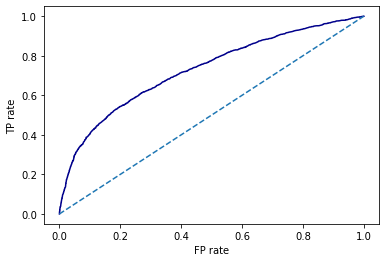

In [80]:
from sklearn.metrics import roc_curve
fallout, sensitivity, thresholds = roc_curve(y_test, preds_df['prob_default'])
plt.plot(fallout, sensitivity,color = 'darkblue') #FP, TP

plt.plot([0, 1], [0, 1], linestyle='--') ##random guess
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.show()
#ROC curve plot TP against FP at different threshold

In [81]:
clf_logistic.score(X_test, y_test) #accuracy

0.7983706720977597

In [82]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, preds_df['loan_status'])

In [83]:
auc 
#the ROC chart shows the tradeoff between all values of our false positive rate (fallout) 
#and true positive rate (sensitivity).

0.5682620906693627

In [84]:
preds_df

,prob_default,loan_status
0,0.339239,0
1,0.464859,0
2,0.095806,0
3,0.144805,0
4,0.144894,0
...,...,...
11779,0.056305,0
11780,0.215789,0
11781,0.206715,0
11782,0.254723,0


In [85]:
preds

array([[0.66076115, 0.33923885],
       [0.53514117, 0.46485883],
       [0.90419403, 0.09580597],
       ...,
       [0.79328529, 0.20671471],
       [0.74527736, 0.25472264],
       [0.74684671, 0.25315329]])

## Model Discrimination and impact

In [86]:
# Reassign the values of loan status based on the new threshold, 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [87]:
preds_df['loan_status'].value_counts()

0    10250
1     1534
Name: loan_status, dtype: int64

In [88]:
# Store the number of loan defaults from the prediction data
pred_num_defaults = preds_df['loan_status'].value_counts()[1]

In [89]:
pred_num_defaults

1534

In [90]:
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

In [91]:
default_recall #threshold at 0.4 is prefered
#it has a higher default recall rate than the threshold at 0.5

0.34416086620262953

In [92]:
cr_loan_prep['loan_amnt'].mean()

9583.600936895346

In [93]:
avg_loan_amnt = 50
#Estimated Loss on Defaults
# Calculate the estimated impact of the new default recall rate
print(avg_loan_amnt * pred_num_defaults * (1 - default_recall))

50302.86156225832


In [95]:
thresh=[0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,
 0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65]

In [96]:
ticks=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

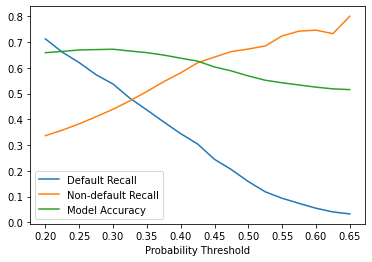

In [97]:
def_recalls=[]
nondef_recalls=[]
accs=[]
pred_num_defaults=[]

for i in thresh:
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > i else 0)
    def_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0][1])
    accs.append(roc_auc_score(y_test, preds_df['loan_status']))
    pred_num_defaults.append(preds_df['loan_status'].value_counts()[1]) #for calculating loss
    
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs) 

plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()
#final target is to minimize the expected loss
#start evaluting the model at threshold where three graphs intersect
#declaring all loans about the intersction point to be a default is probably not practical

In [98]:
pred_num_defaults=np.array(pred_num_defaults)
def_recalls=np.array(def_recalls)
thresh=np.array(thresh)
#change from list ot numpy array for elementwise multiplication

In [99]:
thresh.shape[0]

19

In [100]:
for i in range(thresh.shape[0]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [101]:
avg_loan_amnt = 50
#Estimated Loss on Defaults
# Calculate the estimated impact of the new default recall rate
for i in range(thresh.shape[0]):
    print(thresh[i],avg_loan_amnt * pred_num_defaults[i] * (1 - def_recalls[i]))
#greater thresh => smaller num of predicted default => more willing to lend money

0.2 78850.15467904098
0.225 81060.51817478731
0.25 79692.94276875483
0.275 77149.16860015468
0.3 73265.15854601702
0.325 68424.1879350348
0.35 62610.55684454757
0.375 56296.906419180195
0.4 50302.86156225832
0.425 44164.73317865429
0.45 37213.65042536736
0.475 31737.935034802784
0.5 25591.956689868523
0.525 19705.336426914153
0.55 15098.317865429233
0.575 11859.551430781128
0.6 8934.744779582366
0.625 6814.46249033256
0.65 5079.4663573085845


In [102]:
pred_num_defaults ##greater thresh => smaller num_pred_defaults

array([5474, 4775, 4193, 3611, 3163, 2639, 2221, 1844, 1534, 1269,  985,
        798,  608,  447,  333,  256,  189,  142,  105], dtype=int64)

In [103]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)
tn, fp, fn, tp = confusion_matrix(y_test,preds_df['loan_status']).ravel()
print(tn, fp, fn, tp)

8554 644 1696 890


In [104]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.65 else 0)
tn, fp, fn, tp = confusion_matrix(y_test,preds_df['loan_status']).ravel()
print(tn, fp, fn, tp)

9177 21 2502 84


In [105]:
#greater threshold =>  smaller num_pred_defaults => more willing to lend money
#=> greater num_pred_non_defaults => more true negative and false negative
#=> consider with cost-benefit matrix
#=> greater threshold make greater income from actual non default
#=> also make greater loss from false negative
#=> generally, incur a larger loss

## Gradient Boosted Trees Using XGBoost

In [106]:
#!pip3 install xgboost

In [107]:
import xgboost as xgb

In [108]:
X_multi.columns

Index(['loan_int_rate', 'person_emp_length'], dtype='object')

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=.4, random_state=123)

In [110]:
# train a model
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

In [111]:
clf_gbt

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
# Predict probabilities of default
gbt_preds_prob = clf_gbt.predict_proba(X_test)

In [113]:
type(gbt_preds_prob)

numpy.ndarray

In [114]:
gbt_preds_prob #non default & default

array([[0.88943744, 0.11056254],
       [0.5918263 , 0.4081737 ],
       [0.88637453, 0.11362547],
       ...,
       [0.85572815, 0.14427185],
       [0.83354217, 0.16645785],
       [0.87654907, 0.12345094]], dtype=float32)

In [115]:
preds_df = pd.DataFrame(gbt_preds_prob[:,1][0:5], columns = ['prob_default'])

In [116]:
preds_df

,prob_default
0,0.110563
1,0.408174
2,0.113625
3,0.221302
4,0.148158


In [117]:
true_df = y_test.head()

In [118]:
true_df

,loan_status
31622,1
24935,1
15342,0
3460,0
16424,1


In [119]:
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)) #first five

   loan_status  prob_default
0            1      0.110563
1            1      0.408174
2            0      0.113625
3            0      0.221302
4            1      0.148158


In [120]:
pd.concat([y_test.reset_index(drop = True), preds_df], axis = 1) #all

,loan_status,prob_default
0,1,0.110563
1,1,0.408174
2,0,0.113625
3,0,0.221302
4,1,0.148158
...,...,...
11779,0,NaN
11780,0,NaN
11781,0,NaN
11782,0,NaN


In [121]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
gbt_preds.shape #11784 records

(11784,)

In [122]:
sum(gbt_preds) #only 1115 predicted default

1115

In [123]:
sum(y_test['loan_status']) #actual default

2586

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,gbt_preds) #tn, fp, fn, tp

array([[8832,  366],
       [1837,  749]], dtype=int64)

In [125]:
from sklearn.metrics import classification_report
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test,gbt_preds, target_names=target_names))
#recall for default is only 0.29. 749/(749+1837)
#29% of actual default are predicted correctly.

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      9198
     Default       0.67      0.29      0.40      2586

    accuracy                           0.81     11784
   macro avg       0.75      0.62      0.65     11784
weighted avg       0.79      0.81      0.78     11784



## Column Selection

In [126]:
cr_loan_prep.shape

(29459, 27)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cr_loan_prep.drop('loan_status', axis = 1), y, test_size=.4, random_state=123)

In [128]:
X1_train = X_train[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
X1_test = X_test[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]

In [129]:
# Create and train the model on the training data
clf_gbt= xgb.XGBClassifier().fit(X1_train,np.ravel(y_train))

In [130]:
clf_gbt.get_booster().get_score(importance_type = 'weight')
#While the F-grade loans don't add much to predictions, they might affect the importance of other training columns.
#correlations to other columns

{'loan_percent_income': 515,
 'loan_int_rate': 1001,
 'person_income': 1299,
 'loan_amnt': 519,
 'person_home_ownership_MORTGAGE': 116,
 'loan_grade_F': 9}

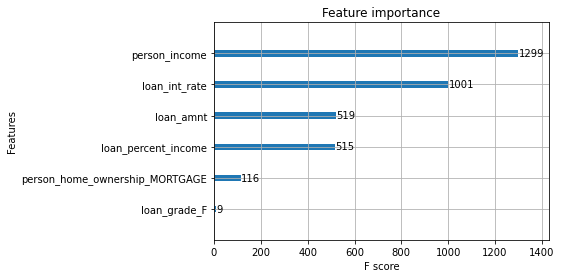

In [131]:
xgb.plot_importance(clf_gbt, importance_type = 'weight')

In [132]:
X2_train = X_train[['loan_int_rate','person_emp_length']]
X3_train = X_train[['person_income','loan_int_rate','loan_percent_income']]
X2_test = X_test[['loan_int_rate','person_emp_length']]
X3_test = X_test[['person_income','loan_int_rate','loan_percent_income']]

In [133]:
clf_gbt2= xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))
clf_gbt3= xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

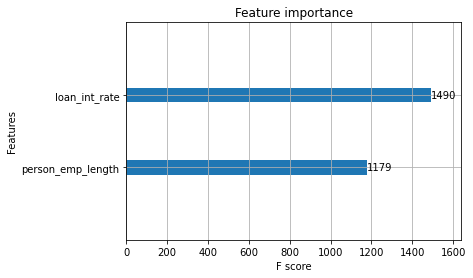

In [134]:
xgb.plot_importance(clf_gbt2, importance_type = 'weight')

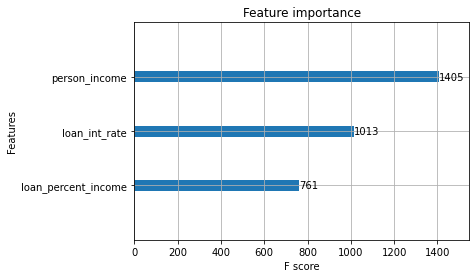

In [135]:
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
#notice that the importance of loan_int_rate went from 1490 to 1013

In [136]:
gbt_preds1 = clf_gbt.predict(X1_test)

In [137]:
sum(gbt_preds1)

2128

In [138]:
sum(y_test['loan_status'])

2586

In [139]:
gbt_preds1.shape

(11784,)

In [140]:
y_test.shape

(11784, 1)

In [141]:
type(gbt_preds)==type(y_test)

False

In [142]:
from sklearn.metrics import classification_report
# Predict the loan_status using each model
gbt2_preds = clf_gbt2.predict(X2_test)
gbt3_preds = clf_gbt3.predict(X3_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt2_preds, target_names=target_names))


# Print the classification report of the second model
print(classification_report(y_test, gbt3_preds, target_names=target_names))
#note the f1-score changes from 0.4 to 0.69, column selection affects the accuracy of model as well as the f1-score

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      9198
     Default       0.67      0.29      0.40      2586

    accuracy                           0.81     11784
   macro avg       0.75      0.62      0.65     11784
weighted avg       0.79      0.81      0.78     11784

              precision    recall  f1-score   support

 Non-Default       0.90      0.94      0.92      9198
     Default       0.74      0.65      0.69      2586

    accuracy                           0.87     11784
   macro avg       0.82      0.79      0.81     11784
weighted avg       0.87      0.87      0.87     11784



In [143]:
clf_gbtallx= xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

In [144]:
gbt_predsallx = clf_gbtallx.predict(X_test)

In [145]:
clf_gbtallx.get_booster().get_score(importance_type = 'weight')

{'loan_percent_income': 262,
 'loan_int_rate': 503,
 'person_income': 722,
 'loan_grade_D': 40,
 'loan_intent_HOMEIMPROVEMENT': 36,
 'loan_intent_DEBTCONSOLIDATION': 53,
 'loan_intent_MEDICAL': 63,
 'loan_grade_C': 41,
 'person_emp_length': 286,
 'person_home_ownership_OWN': 48,
 'person_age': 287,
 'person_home_ownership_RENT': 57,
 'person_home_ownership_OTHER': 2,
 'cb_person_default_on_file_N': 29,
 'loan_grade_G': 12,
 'person_home_ownership_MORTGAGE': 40,
 'cb_person_cred_hist_length': 168,
 'loan_intent_VENTURE': 34,
 'loan_amnt': 349,
 'loan_intent_EDUCATION': 40,
 'loan_intent_PERSONAL': 30,
 'loan_grade_E': 26,
 'loan_grade_B': 33,
 'loan_grade_F': 9,
 'loan_grade_A': 1}

In [146]:
# Print the classification report of the allX-included model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_predsallx, target_names=target_names))
#all performance improved
#but this allX-included model is hard to explain

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



## Cross Validation

In [147]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
24407,30,72000,3.0,9000,14.22,0.13,6,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2528,23,21000,2.0,3000,12.68,0.14,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
15961,22,4800,0.0,1200,14.26,0.25,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6966,26,92000,0.0,6000,15.58,0.07,3,0,0,0,...,1,0,0,0,1,0,0,0,1,0
13832,21,96000,1.0,7000,12.53,0.07,4,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31658,36,120000,12.0,14500,5.42,0.12,15,1,0,0,...,0,1,0,0,0,0,0,0,1,0
19573,34,54000,5.0,3000,15.37,0.06,6,0,0,0,...,0,0,0,0,1,0,0,0,0,1
30980,38,72000,8.0,6000,5.99,0.08,11,1,0,0,...,0,1,0,0,0,0,0,0,1,0
17358,22,28000,5.0,6900,9.99,0.25,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [148]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10 #similar to number of iteration
params={'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df=xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.898182       0.001318       0.892519      0.004650
1        0.909256       0.002052       0.902780      0.005053
2        0.913621       0.002205       0.906834      0.004423
3        0.918600       0.001092       0.910779      0.005221
4        0.922251       0.001818       0.914193      0.004422


In [149]:
cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)

In [150]:
# Print the first five rows of the CV results data frame
print(cv_results_big.head())

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.897568       0.000909       0.892900      0.008258
1        0.906985       0.002611       0.901162      0.007519
2        0.913678       0.001403       0.907910      0.007753
3        0.919123       0.000921       0.912130      0.007145
4        0.922864       0.001097       0.914962      0.006706


In [151]:
# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']))

0.9427637173333318


In [152]:
cv_results_big['test-auc-mean'].shape #num_boost_round = 600

(600,)

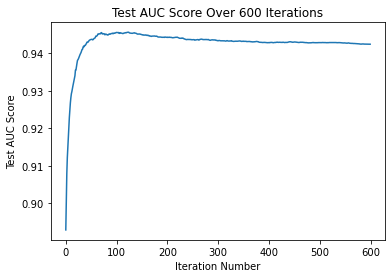

In [153]:
# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [154]:
#Notice that the test AUC score never quite reaches 1.0 and begins to decrease slightly after 100 iterations.
#This is because this much cross-validation can actually cause the model to become overfit.
#So, there is a limit to how much cross-validation you should to.

In [155]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

In [156]:
from sklearn.model_selection import cross_val_score

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, y_train, cv = 4)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [157]:
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

In [158]:
cv_scores

array([0.94048427, 0.93256393, 0.93324282, 0.92462653])

In [159]:
np.mean(cv_scores)

0.9327293859769089

In [160]:
print("Average accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_scores),
                                              np.std(cv_scores) * 2))

Average accuracy: 0.93 (+/- 0.01)


In [161]:
# try different value of learning rate and max_depth
# choose the learning rate and max_depth for which they give the best accuracy

## Handling with imbalance data

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cr_loan_prep.drop('loan_status', axis = 1), cr_loan_prep['loan_status'], test_size=.4, random_state=123)

In [163]:
# undersampling, compare it with boosting
X_y_train = pd.concat([X_train.reset_index(drop = True),y_train.reset_index(drop = True)], axis = 1)
X_y_test = pd.concat([X_test.reset_index(drop = True),y_test.reset_index(drop = True)], axis = 1)

In [164]:
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [165]:
count_nondefault, count_default

(13798, 3877)

In [166]:
X_y_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,30,72000,3.0,9000,14.22,0.13,6,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,23,21000,2.0,3000,12.68,0.14,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,22,4800,0.0,1200,14.26,0.25,2,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,26,92000,0.0,6000,15.58,0.07,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,21,96000,1.0,7000,12.53,0.07,4,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [167]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

In [168]:
nondefaults.shape

(13798, 27)

In [169]:
# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

In [170]:
nondefaults_under.shape

(3877, 27)

In [171]:
# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
defaults.reset_index(drop = True)], axis=0)

In [172]:
# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3877
0    3877
Name: loan_status, dtype: int64


In [173]:
clf_gbt_original= xgb.XGBClassifier().fit(X_train,np.ravel(y_train))
clf_gbt_undersample= xgb.XGBClassifier().fit(X_y_train_under.drop(['loan_status'],axis=1),np.ravel(X_y_train_under['loan_status']))
gbt_preds_original = clf_gbt_original.predict(X_test)
gbt_preds_undersample = clf_gbt_undersample.predict(X_y_test.drop(['loan_status'],axis=1))

In [174]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds_original, target_names=target_names))
print(classification_report(y_test, gbt_preds_undersample, target_names=target_names))
#it is more important that the recall of defaults be high, because a default predicted as non-default is more costly.

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.73      0.82      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.84      0.87      0.85     11784
weighted avg       0.90      0.89      0.90     11784



In [175]:
from sklearn.metrics import confusion_matrix
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds_original)) #tn, fp, fn, tp
print(confusion_matrix(y_test,gbt_preds_undersample))  #tn, fp, fn, tp

[[9085  113]
 [ 677 1909]]
[[8416  782]
 [ 469 2117]]


In [176]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds_original))
print(roc_auc_score(y_test, gbt_preds_undersample))

0.8629602218579747
0.8668101710802659


In [177]:
#Looks like this is classified as a success! Undersampling the training data results in more false positives, 
#but the recall for defaults and the AUC score are both higher than the original model. 
#This means overall it predicts defaults much more accurately.

In [178]:
#accuracy decreased, but recall for default increased.

## Model evaluation and implementation

In [179]:
# Create and train the model on the training data
clf_gbt= xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

In [180]:
clf_gbt

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [182]:
clf_logistic

LogisticRegression()

In [183]:
preds = clf_logistic.predict_proba(X_test)
preds_df_lr = pd.DataFrame(preds[:,1], columns = ['prob_default'])
# Reassign the values of loan status based on the new threshold
preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [184]:
from sklearn.metrics import classification_report
# Print the classification report of clf_logistic
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9198
     Default       0.62      0.46      0.53      2586

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784



In [185]:
preds_gbt = clf_gbt.predict(X_test)

In [186]:
from sklearn.metrics import classification_report
# Print the classification report of clf_logistic
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_gbt, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



In [187]:
#the scores from the classification_report() are all higher for the gradient boosted tree
#This means the tree model is better in all of these aspects.

In [188]:
preds_df_lr

,prob_default,loan_status
0,0.445779,1
1,0.223447,0
2,0.288558,0
3,0.169358,0
4,0.114182,0
...,...,...
11779,0.079626,0
11780,0.051979,0
11781,0.522450,1
11782,0.370478,0


In [189]:
preds_gbt_prob = clf_gbt.predict_proba(X_test)

In [190]:
preds_gbt_prob

array([[9.0582967e-03, 9.9094170e-01],
       [1.6012788e-02, 9.8398721e-01],
       [9.9919266e-01, 8.0736284e-04],
       ...,
       [9.5428050e-01, 4.5719486e-02],
       [6.5126348e-01, 3.4873655e-01],
       [9.4514960e-01, 5.4850418e-02]], dtype=float32)

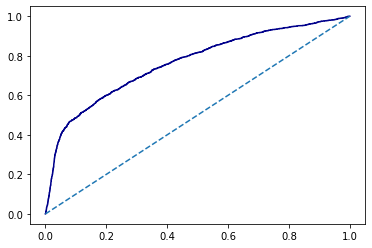

In [191]:
from sklearn.metrics import roc_curve
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds_df_lr['prob_default'])
plt.plot(fallout_lr, sensitivity_lr,color = 'darkblue')

plt.plot([0, 1], [0, 1], linestyle='--') ##random guess
plt.show()

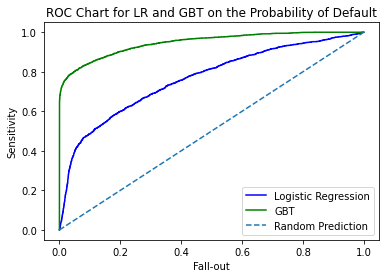

In [192]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds_df_lr['prob_default'])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, preds_gbt_prob[:,1])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [193]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" %  roc_auc_score(y_test,  preds_df_lr['prob_default']))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, preds_gbt_prob[:,1]))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.95


In [194]:
from sklearn.calibration import calibration_curve
fraction_of_positives_tree, mean_predicted_value_tree = calibration_curve(y_test, preds_gbt_prob[:,1], n_bins = 10)
# Fraction of positives
# Average probability

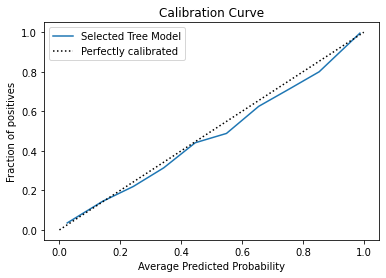

In [195]:
# Create the calibration curve plot with the guideline
plt.plot(mean_predicted_value_tree, fraction_of_positives_tree, label="%s" % "Selected Tree Model")
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [196]:
from sklearn.calibration import calibration_curve
fraction_of_positives_lr,mean_predicted_value_lr = calibration_curve(y_test,preds_df_lr['prob_default'], n_bins = 20)
## Fraction of positives
## Average probability

In [197]:
mean_predicted_value_lr.shape #n_bins may have value less than the chose one

(16,)

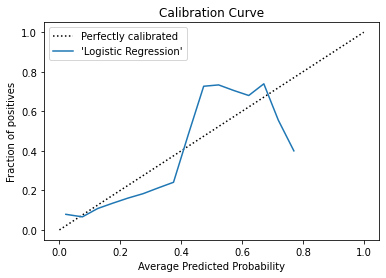

In [198]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_predicted_value_lr, fraction_of_positives_lr, label="%s" % "'Logistic Regression'")
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()


# add this to the previous
#plt.plot(mean_predicted_value, fraction_of_positives, label="%s" % "Example Model")

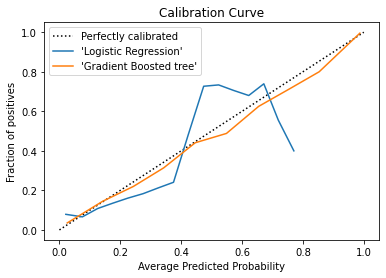

In [199]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_predicted_value_lr, fraction_of_positives_lr, label="%s" % "'Logistic Regression'")
plt.plot(mean_predicted_value_tree, fraction_of_positives_tree, label="%s" % "'Gradient Boosted tree'")
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()


# add this to the previous
#plt.plot(mean_predicted_value, fraction_of_positives, label="%s" % "Example Model")

In [200]:
#Notice that for the logistic regression, the calibration for probabilities starts off great 
#but then gets more erratic as it the average probability approaches 0.4. 
#Something similar happens to the gradient boosted tree around 0.5, 
#but the model eventually stabilizes. We will be focusing on only the gbt model from now on

## Acceptance rate and bad rate

In [201]:
preds_gbt_prob[:,1]

array([9.9094170e-01, 9.8398721e-01, 8.0736284e-04, ..., 4.5719486e-02,
       3.4873655e-01, 5.4850418e-02], dtype=float32)

In [202]:
preds_gbt_df = pd.DataFrame(preds_gbt_prob[:,1],columns=['prob_default'])
preds_gbt_df

,prob_default
0,0.990942
1,0.983987
2,0.000807
3,0.001239
4,0.084892
...,...
11779,0.000727
11780,0.025336
11781,0.045719
11782,0.348737


In [203]:
test_pred_df = pd.concat([y_test.reset_index(drop = True) , preds_gbt_df['prob_default']], axis = 1)

In [204]:
test_pred_df #true loan_status

,loan_status,prob_default
0,1,0.990942
1,1,0.983987
2,0,0.000807
3,0,0.001239
4,1,0.084892
...,...,...
11779,0,0.000727
11780,0,0.025336
11781,0,0.045719
11782,0,0.348737


In [205]:
test_pred_df['prob_default'].describe()

count    11784.000000
mean         0.214354
std          0.345175
min          0.000001
25%          0.009491
50%          0.042282
75%          0.188474
max          0.999996
Name: prob_default, dtype: float64

Text(0, 0.5, 'no. of loans')

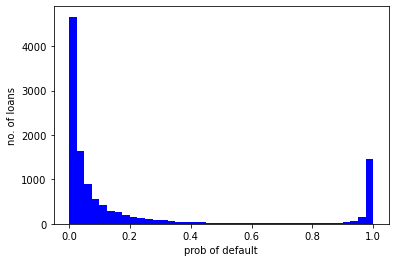

In [206]:
plt.hist(test_pred_df['prob_default'], color = 'blue', bins = 40)
plt.xlabel('prob of default')
plt.ylabel('no. of loans')

In [207]:
# Compute the threshold for 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

In [208]:
threshold_85

0.8482091128826122

In [209]:
# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

In [210]:
test_pred_df['pred_loan_status'].value_counts() #10016 is 85% of the total data
#85% are predicted as non default, so to lend money out

0    10016
1     1768
Name: pred_loan_status, dtype: int64

In [211]:
sum(test_pred_df['prob_default']<0.1) #7770 of data have prob of default lower than 10%

7770

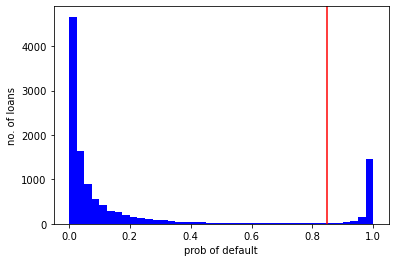

In [212]:
plt.hist(test_pred_df['prob_default'], color = 'blue', bins = 40)
plt.xlabel('prob of default')
plt.ylabel('no. of loans')

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold_85, color = 'red')
plt.show()

In [213]:
# Print the top 5 rows of the new data frame
test_pred_df.head()

,loan_status,prob_default,pred_loan_status
0,1,0.990942,1
1,1,0.983987,1
2,0,0.000807,0
3,0,0.001239,0
4,1,0.084892,0


In [214]:
# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

In [215]:
accepted_loans.shape

(10016, 3)

In [216]:
test_pred_df.shape

(11784, 3)

In [217]:
# Calculate the bad rate
np.sum(accepted_loans['loan_status']) / accepted_loans['loan_status'].count()
#actual default/predicted non default

0.08306709265175719

In [218]:
#with threshold 85%, only about 8% accepted loans are actual default

In [219]:
#compared with threshold 100%, which has high bad rate of 22%
#threshold_100 = np.quantile(test_pred_df['prob_default'], 1)
# Apply acceptance rate threshold
#test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_100 else 0)
# Calculate the bad rate
#accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
#np.sum(accepted_loans['loan_status']) / len(accepted_loans['loan_status'])

In [220]:
X_test['loan_amnt']

31622    15000
24935    11200
15342    15000
3460     10800
16424     3000
         ...  
25231     8000
30380     6600
29849    16000
1780      6000
11446    10000
Name: loan_amnt, Length: 11784, dtype: int64

In [221]:
test_pred_df['loan_amnt']=X_test['loan_amnt']

In [222]:
# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

count     4224.000000
mean      8344.182055
std       5572.388941
min        500.000000
25%       4800.000000
50%       7000.000000
75%      10000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [223]:
# Store the average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

In [224]:
# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
pd.crosstab(test_pred_df['loan_status'],
                 test_pred_df['pred_loan_status']).apply(lambda x: x * avg_loan, axis = 0)

pred_loan_status,0,1
loan_status,,
0,"$76,632,967.99","$116,818.55"
1,"$6,942,359.47","$14,635,695.32"


## Credit strategy and minimum expected loss

In [225]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [226]:
thresholds =[]
bad_rates =[]

In [227]:
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(test_pred_df['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(thresh)
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))

In [228]:
pd.options.display.float_format = "{:,.3f}".format
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
strat_df

,Acceptance Rate,Threshold,Bad Rate
0,1.000,1.000,0.219
1,0.950,0.997,0.177
2,0.900,0.989,0.132
3,0.850,0.848,0.083
4,0.800,0.308,0.059
5,0.750,0.188,0.049
6,0.700,0.130,0.041
7,0.650,0.093,0.033
8,0.600,0.070,0.028
9,0.550,0.054,0.023


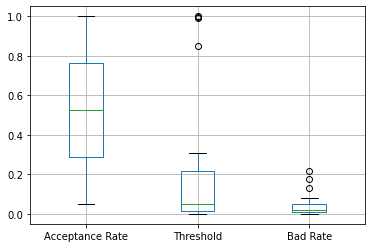

In [229]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

<ipython-input-230-b53c2c41f710>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.grid()
<ipython-input-230-b53c2c41f710>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.grid()


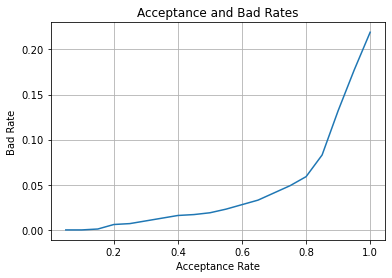

In [230]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [231]:
#The bad rates are very low up until the acceptance rate 0.6 where they suddenly increase. 
#This suggests that many of the accepted(predicted non default) actual defaults 
#may have a prob_default value between 0.6 and 0.8.

In [232]:
test_pred_df.shape

(11784, 4)

In [233]:
Num_Accepted_Loans=[]
Avg_Loan_Amnt=[]
Estimated_Value=[]

# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(test_pred_df['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(thresh)
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))
    
    ### add three columns ###
    Num_Accepted_Loans.append(len(accepted_loans))
    Avg_Loan_Amnt.append(np.mean(X_test['loan_amnt']))
    Estimated_Value.append((Num_Accepted_Loans[-1] * (1-bad_rates[-1]) * Avg_Loan_Amnt[-1] - 
Num_Accepted_Loans[-1] * bad_rates[-1] * Avg_Loan_Amnt[-1]))

In [234]:
pd.options.display.float_format = "{:,.2f}".format
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, Num_Accepted_Loans, Avg_Loan_Amnt, Estimated_Value),
columns = ['Acceptance Rate','Threshold','Bad Rate','Num Accepted Loans','Avg_Loan_Amnt', 'Estimated Value'])

# Print the entire table
strat_df

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg_Loan_Amnt,Estimated Value
0,1.00,1.00,0.22,11784,"9,556.28","63,287,522.50"
1,0.95,1.00,0.18,11174,"9,556.28","68,981,118.25"
2,0.90,0.99,0.13,10599,"9,556.28","74,547,271.40"
3,0.85,0.85,0.08,10016,"9,556.28","79,826,927.15"
4,0.80,0.31,0.06,9428,"9,556.28","79,465,240.91"
5,0.75,0.19,0.05,8830,"9,556.28","76,112,552.48"
6,0.70,0.13,0.04,8247,"9,556.28","72,348,198.45"
7,0.65,0.09,0.03,7661,"9,556.28","68,378,785.67"
8,0.60,0.07,0.03,7064,"9,556.28","63,725,276.75"
9,0.55,0.05,0.02,6480,"9,556.28","59,076,182.84"


In [235]:
strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])]
##Note that the allowable bad rate is set

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg_Loan_Amnt,Estimated Value
3,0.85,0.85,0.08,10016,"9,556.28","79,826,927.15"


<ipython-input-236-693b25b0a170>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.grid()
<ipython-input-236-693b25b0a170>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.grid()


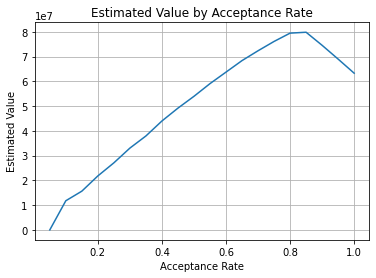

In [236]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

## Total expected loss

In [237]:
## Expected Loss = POD * EAD * LGD
## assume LGD=1, EAD=loan amount
test_pred_df['loss_given_default']=1

In [238]:
test_pred_df #why nan value in loan_amnt??

,loan_status,prob_default,pred_loan_status,loan_amnt,loss_given_default
0,1,0.99,1,nan,1
1,1,0.98,1,nan,1
2,0,0.00,1,nan,1
3,0,0.00,1,nan,1
4,1,0.08,1,nan,1
...,...,...,...,...,...
11779,0,0.00,1,"6,700.00",1
11780,0,0.03,1,nan,1
11781,0,0.05,1,nan,1
11782,0,0.35,1,"10,000.00",1


In [239]:
test_pred_df['loan_amnt']=X_test['loan_amnt'].reset_index()['loan_amnt']

#test_pred_df['loan_amnt']=X_test['loan_amnt'] this line does not work because of indexing

In [240]:
test_pred_df

,loan_status,prob_default,pred_loan_status,loan_amnt,loss_given_default
0,1,0.99,1,15000,1
1,1,0.98,1,11200,1
2,0,0.00,1,15000,1
3,0,0.00,1,10800,1
4,1,0.08,1,3000,1
...,...,...,...,...,...
11779,0,0.00,1,8000,1
11780,0,0.03,1,6600,1
11781,0,0.05,1,16000,1
11782,0,0.35,1,6000,1


In [241]:
pd.options.display.float_format = "{:,.6f}".format
test_pred_df 

,loan_status,prob_default,pred_loan_status,loan_amnt,loss_given_default
0,1,0.990942,1,15000,1
1,1,0.983987,1,11200,1
2,0,0.000807,1,15000,1
3,0,0.001239,1,10800,1
4,1,0.084892,1,3000,1
...,...,...,...,...,...
11779,0,0.000727,1,8000,1
11780,0,0.025336,1,6600,1
11781,0,0.045719,1,16000,1
11782,0,0.348737,1,6000,1


In [242]:
# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))
#this is not related to accept rate and bad rate
#without them, total expected loss can still be calculated

Total expected loss:  $26,919,914.06


In [243]:
#This is the total expected loss for the entire portfolio using the gradient boosted tree. 
#$27 million may seem like a lot, but the total expected loss would have been over $28 million with the logistic regression.
#Some losses are unavoidable, but your work here might have saved the company a million dollars!